In [1]:
!pip install tensorflow matplotlib



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

dataset_path = "."

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(6,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)

model.save("dental_multi_model.h5")


Found 417 images belonging to 7 classes.
Found 100 images belonging to 7 classes.


C:\Users\aksha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 7), output.shape=(None, 6)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# dataset path = current folder
dataset_path = "."

# image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# training data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# validation data
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# CNN model
model = models.Sequential([
    layers.Input(shape=(224,224,3)),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(7,activation='softmax')   # 7 classes
])

# compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)

# save model
model.save("dental_multi_model.h5")

print("Training complete!")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("dental_multi_model.h5")

print("Model loaded successfully")


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# class names (auto read from folders)
class_names = sorted(os.listdir("."))

# choose test image (change filename!)
img_path = "Caries/" + os.listdir("Caries")[0]

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

print("Test image:", img_path)
print("Predicted disease:", predicted_class)


In [ ]:
import numpy as np

prediction = model.predict(img_array)[0]

print("\nPrediction probabilities:\n")

for i, prob in enumerate(prediction):
    print(f"{class_names[i]} : {prob*100:.2f}%")


In [ ]:
import os

# keep only real folders (ignore files)
class_names = sorted([
    name for name in os.listdir(".")
    if os.path.isdir(name)
])

print("Clean classes:", class_names)


In [ ]:
import os

class_names = sorted([
    name for name in os.listdir(".")
    if os.path.isdir(name) and not name.startswith(".")
])

print("Final clean classes:", class_names)


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class}", fontsize=14)
plt.show()


In [ ]:
import random
import os
import matplotlib.pyplot as plt

# pick a random class
random_class = random.choice(class_names)

# pick a random image from that class
random_img = random.choice(os.listdir(random_class))
img_path = os.path.join(random_class, random_img)

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(img)
plt.axis("off")
plt.title(f"True: {random_class}\nPredicted: {predicted_class}", fontsize=14)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "."

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load pretrained model
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # freeze pretrained layers

# Build new model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

model.save("dental_improved_model.h5")

print("Improved model training complete!")


In [1]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])


NameError: name 'models' is not defined

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
dataset_path = "."

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 417 images belonging to 7 classes.
Found 100 images belonging to 7 classes.


In [3]:
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False


In [4]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

model.save("dental_improved_model.h5")

print("Improved model training complete!")


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3525 - loss: 1.8082 - val_accuracy: 0.4400 - val_loss: 1.6723
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3669 - loss: 1.5762 - val_accuracy: 0.3700 - val_loss: 1.5243
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4125 - loss: 1.4205 - val_accuracy: 0.4200 - val_loss: 1.4842
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4460 - loss: 1.3632 - val_accuracy: 0.3600 - val_loss: 1.5009
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4149 - loss: 1.3264 - val_accuracy: 0.2900 - val_loss: 1.6040
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4508 - loss: 1.3117 - val_accuracy: 0.3600 - val_loss: 1.5316
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3549 - loss: 1.3693 - val_accuracy: 0.3800 - val_loss: 1.6214
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4149 - loss: 1.2484 - val_accuracy: 0.3900 - val_loss:

Improved model training complete!


In [5]:
from tensorflow.keras.models import load_model

model = load_model("dental_improved_model.h5")

print("Improved model loaded!")


Improved model loaded!


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


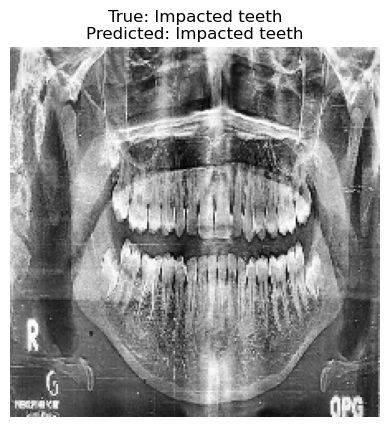

In [6]:
import numpy as np
import os
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# clean class list
class_names = sorted([
    name for name in os.listdir(".")
    if os.path.isdir(name) and not name.startswith(".")
])

# pick random class + image
true_class = random.choice(class_names)
img_file = random.choice(os.listdir(true_class))
img_path = os.path.join(true_class, img_file)

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(img)
plt.axis("off")
plt.title(f"True: {true_class}\nPredicted: {predicted_class}")
plt.show()


In [7]:
!pip install streamlit



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
model.save("dental_model.h5")
print("Model saved!")


Model saved!
